## Setup

In [2]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt

## Prepare the data

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it into train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

# Convert class vectors to binary class matrices (one-hot encoding)
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
y_train shape: (60000,)
y_test shape: (10000,)


## Plot a random sample

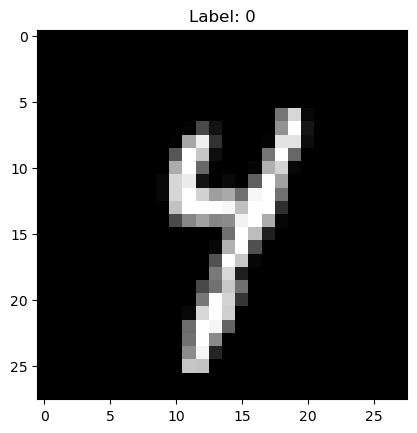

In [5]:
# Plot a random sample and display its label in the title.

# Get a random sample.
index = np.random.randint(0, len(x_train))
image = x_train[index]
label = y_train[index]

# Plot the sample.
fig = plt.figure()
plt.imshow(image.squeeze(), cmap='gray')
plt.title("Label: " + str(np.argmax(label)))
plt.show()

## Name five examples of activation functions
    1. Sigmoid
    2. Tanh
    3. ReLU
    4. Leaky ReLU
    5. Softmax

## Build the model

In [6]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(8, kernel_size=(3, 3), activation="relu", padding="same"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(16, kernel_size=(3, 3), activation="relu", padding="same"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          4640      
                                                                 
 flatten (Flatten)           (None, 1568)              0

## Train the model

In [7]:
batch_size = 128
epochs = 10

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 4s 9ms/step - loss: 0.3191 - acc: 0.9052 - val_loss: 0.0726 - val_acc: 0.9792
Epoch 2/10
422/422 [==============================] - 3s 8ms/step - loss: 0.0856 - acc: 0.9734 - val_loss: 0.0547 - val_acc: 0.9838
Epoch 3/10
422/422 [==============================] - 3s 8ms/step - loss: 0.0603 - acc: 0.9811 - val_loss: 0.0454 - val_acc: 0.9872
Epoch 4/10
422/422 [==============================] - 3s 8ms/step - loss: 0.0476 - acc: 0.9845 - val_loss: 0.0417 - val_acc: 0.9888
Epoch 5/10
422/422 [==============================] - 3s 8ms/step - loss: 0.0403 - acc: 0.9870 - val_loss: 0.0401 - val_acc: 0.9898
Epoch 6/10
422/422 [==============================] - 3s 8ms/step - loss: 0.0325 - acc: 0.9896 - val_loss: 0.0373 - val_acc: 0.9888
Epoch 7/10
422/422 [==============================] - 3s 8ms/step - loss: 0.0282 - acc: 0.9909 - val_loss: 0.0342 - val_acc: 0.9918
Epoch 8/10
422/422 [==============================] - 3s 8ms/step - loss: 0.

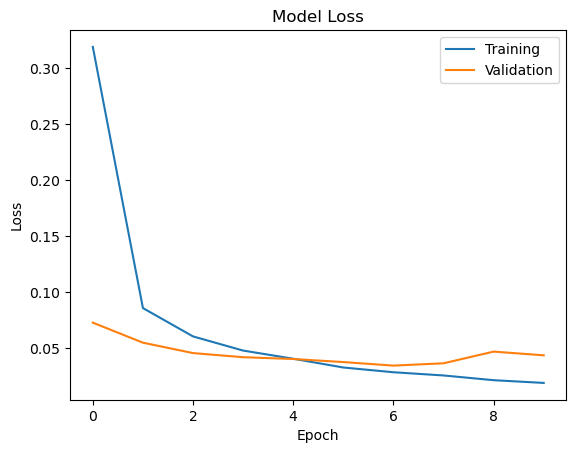

In [8]:
# Plot of the training and validation loss with the number of epochs and circle at each epoch.
fig = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()



## Evaluate the trained model

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {score[0]:.3f}")
print(f"Test accuracy:{score[1]* 100:.2f}%")

Test loss: 0.039
Test accuracy:98.88%
